# Manual fitting H2O and Silicate areas from unexposed MIs
- This notebook shows how to quantify the relative area of the silicate peak and H$_2$O peak, specifically from acquisitions of olivine-hosted melt inclusions. Specifically, the code unmixes the olivine and melt inclusions spectra to obtain the glass spectra

### Install DiadFit if you havent already- uncomment this!

In [ ]:
#!pip install --upgrade DiadFit

## Import necessary python things

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import DiadFit as pf
pf.__version__

'0.0.57'

In [2]:
import os
DayFolder=os.getcwd()
meta_path=DayFolder +  '\MetaData'
spectra_path=DayFolder + '\Spectra'
file_ext='.txt'
filetype='Witec_ASCII'

## Get files for acquisitions on MIs

In [3]:
H2O_Files=pf.get_files(path=spectra_path,
file_ext=file_ext, ID_str='H2O', 
exclude_str=['depth', 'line', 'scan'], sort=False)
H2O_Files

['02 CC14_MI2_H2O_96mw.txt',
 '05 CC13_MI4_H2O.txt',
 '09 CC9_MI3_H2O.txt',
 '12 CC9_MI1_H2O_20X.txt',
 '15 CC9_MI1_H2O_50X.txt',
 '18 CC5_MI1_H2O_10mw.txt',
 '21 CC7_MI3_H2O.txt',
 '24 CC4_MI1_H2O.txt',
 '29 MS13_2_MI1_H2O.txt']

## Get files for acquisitions on Olivine

In [4]:
Ol_Files=pf.get_files(path=spectra_path,
file_ext=file_ext, ID_str='Ol',
exclude_str=['depth', 'line', 'scan'], sort=False)
Ol_Files

['03 CC14_MI2_Ol_96mw.txt',
 '06 CC13_MI4_Ol.txt',
 '10 CC9_MI3_Ol.txt',
 '16 CC9_MI1_Ol_50X.txt',
 '19 CC5_MI1_Ol.txt',
 '22 CC7_MI3_Ol.txt',
 '25 CC4_MI1_Ol.txt',
 '30 MS13_2_MI1_Ol.txt']

## Now we need to find the relevant H2O and Olivine file for the unmixing
- Here, we look at the components of each file name, and extract the relevant strings into a dataframe

In [5]:
print(Ol_Files[0].split('_'))

['03 CC14', 'MI2', 'Ol', '96mw.txt']


In [6]:
pf.extracting_filenames_generic(names=Ol_Files, prefix=True, str_prefix=' ',
   file_type='.txt')

array(['CC14_MI2_Ol_96mw', 'CC13_MI4_Ol', 'CC9_MI3_Ol', 'CC9_MI1_Ol_50X',
       'CC5_MI1_Ol', 'CC7_MI3_Ol', 'CC4_MI1_Ol', 'MS13_2_MI1_Ol'],
      dtype=object)

In [7]:
pos_crystal=0 
pos_MI=1
char_crystal='_'
char_MI='_'
Ol_Files_extract=pf.extract_xstal_MI_name(files=Ol_Files, prefix=True, str_prefix=' ',
char_xstal=char_crystal, pos_xstal=pos_crystal, char_MI=char_MI, pos_MI=pos_MI)
Ol_Files_extract.head()

,filename,crystal_name,MI_name
0,03 CC14_MI2_Ol_96mw.txt,CC14,MI2
1,06 CC13_MI4_Ol.txt,CC13,MI4
2,10 CC9_MI3_Ol.txt,CC9,MI3
3,16 CC9_MI1_Ol_50X.txt,CC9,MI1
4,19 CC5_MI1_Ol.txt,CC5,MI1


In [8]:
help(pf.extract_xstal_MI_name)

Help on function extract_xstal_MI_name in module DiadFit.H2O_fitting:

extract_xstal_MI_name(*, files, char_xstal, pos_xstal, char_MI, pos_MI, prefix=True, str_prefix=' ', file_type='.txt')
    Extracts the names of the crystal and MI samples from a list of filenames
    
    Parameters
    ------------
    files (list): A list of filenames.
    
    char_xstal (str), char_MI (str):
        The character or string used to split the filenames into parts. E.g. '_' if the filename is of the form 'FM_7_MI'.
    
    pos_xstal (int): The index of the part of the split filename that corresponds to the crystal sample name.
    
    
    
    pos_MI (int): The index of the part of the split filename that corresponds to the MI sample name.
    
    prefix (bool, optional):
        If True, removes prefix. E.g. WITEC instruments where 01 is appended onto the first file.
    
    str_prefix (str, optional): The prefix that the filenames should have if `prefix` is True. Default is " ".
    
    fi

### Same for H2O - look at fit components

In [9]:
print(H2O_Files[0].split('_'))

['02 CC14', 'MI2', 'H2O', '96mw.txt']


In [10]:
H2O_Files_extract=pf.extract_xstal_MI_name(files=H2O_Files,prefix=True, str_prefix=' ',
char_xstal=char_crystal, pos_xstal=pos_crystal, char_MI=char_MI, pos_MI=pos_MI)
H2O_Files_extract.head()

,filename,crystal_name,MI_name
0,02 CC14_MI2_H2O_96mw.txt,CC14,MI2
1,05 CC13_MI4_H2O.txt,CC13,MI4
2,09 CC9_MI3_H2O.txt,CC9,MI3
3,12 CC9_MI1_H2O_20X.txt,CC9,MI1
4,15 CC9_MI1_H2O_50X.txt,CC9,MI1


In [11]:
merge=H2O_Files_extract.merge(Ol_Files_extract, on=['crystal_name', 'MI_name' ], how='inner')

In [12]:
merge

,filename_x,crystal_name,MI_name,filename_y
0,02 CC14_MI2_H2O_96mw.txt,CC14,MI2,03 CC14_MI2_Ol_96mw.txt
1,05 CC13_MI4_H2O.txt,CC13,MI4,06 CC13_MI4_Ol.txt
2,09 CC9_MI3_H2O.txt,CC9,MI3,10 CC9_MI3_Ol.txt
3,12 CC9_MI1_H2O_20X.txt,CC9,MI1,16 CC9_MI1_Ol_50X.txt
4,15 CC9_MI1_H2O_50X.txt,CC9,MI1,16 CC9_MI1_Ol_50X.txt
5,18 CC5_MI1_H2O_10mw.txt,CC5,MI1,19 CC5_MI1_Ol.txt
6,21 CC7_MI3_H2O.txt,CC7,MI3,22 CC7_MI3_Ol.txt
7,24 CC4_MI1_H2O.txt,CC4,MI1,25 CC4_MI1_Ol.txt
8,29 MS13_2_MI1_H2O.txt,MS13,2,30 MS13_2_MI1_Ol.txt


In [13]:
print('max i value='+str(len(merge)-1))

max i value=8


In [14]:
i=1
filename_H2O=merge['filename_x'].iloc[i]
filename_Ol=merge['filename_y'].iloc[i]
print(merge['filename_y'].iloc[i])

06 CC13_MI4_Ol.txt


In [15]:
spectra_Ol=pf.get_data(path=spectra_path, filename=filename_Ol,
            Diad_files=None, filetype=filetype)

spectra_H2O=pf.get_data(path=spectra_path, filename=filename_H2O,
            Diad_files=None, filetype=filetype)

[Section 1](#Section-1)

## First plot spectra

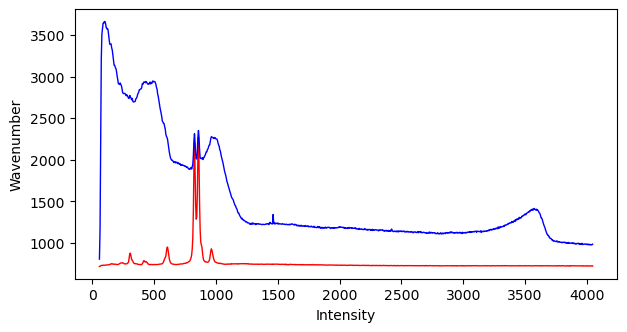

In [16]:
fig, (ax1) = plt.subplots(1, 1, figsize=(7,3.5))
ax1.plot(spectra_Ol[:, 0], spectra_Ol[:,1], '-r', lw=1)
ax1.plot(spectra_H2O[:, 0], spectra_H2O[:,1], '-b', lw=1)
ax1.set_xlabel('Intensity')
ax1.set_ylabel('Wavenumber')
fig.savefig('H2O_Ol.png', dpi=200, transparent=True, bbox_inches='tight')

### Now, lets smooth and trim the spectra, and find the peaks

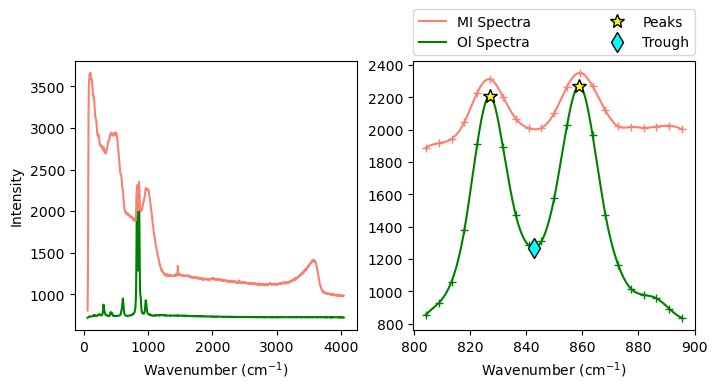

In [17]:
x_new, y_cub_MI, y_cub_Ol, peak_pos_Ol, peak_height_Ol, trough_x, trough_y, fig=pf.smooth_and_trim_around_olivine(
x_range=[800,900], x_max=900, Ol_spectra=spectra_Ol,
MI_spectra=spectra_H2O)
fig.savefig('smooth_Spline.png', dpi=300, bbox_inches='tight')

## Now lets look at different mixing proportions

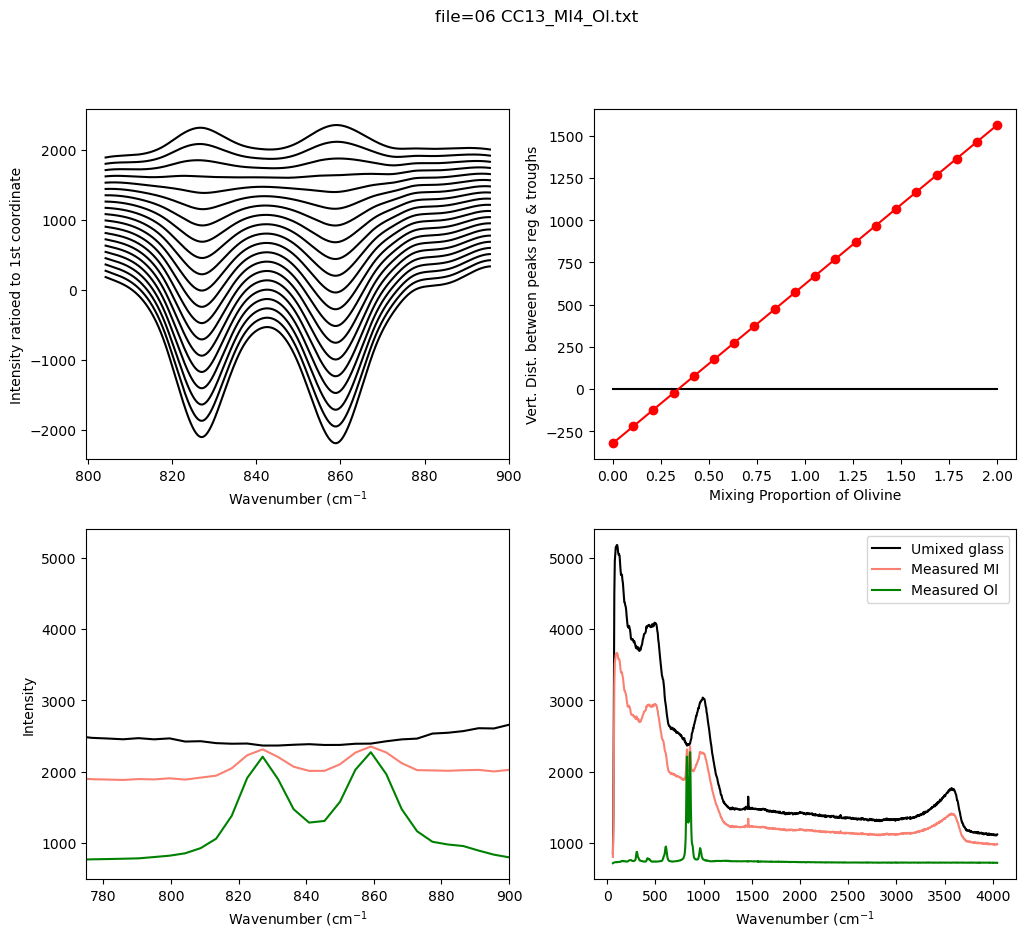

In [19]:
MI_Mix_Best, ideal_mix, Dist, MI_Mix, X=pf.make_evaluate_mixed_spectra(
path=spectra_path, filename=filename_Ol,
smoothed_Ol_y=y_cub_Ol, smoothed_MI_y=y_cub_MI,
Ol_spectra=spectra_Ol, MI_spectra=spectra_H2O, x_new=x_new, 
peak_pos_Ol= peak_pos_Ol,
trough_x=trough_x, trough_y=trough_y, N_steps=20, av_width=2,
                               X_min=0, X_max=2)

### check if spectra needs inverting
- Sometimes the best fit spectra will end up upsideown, this inverts it if this happens

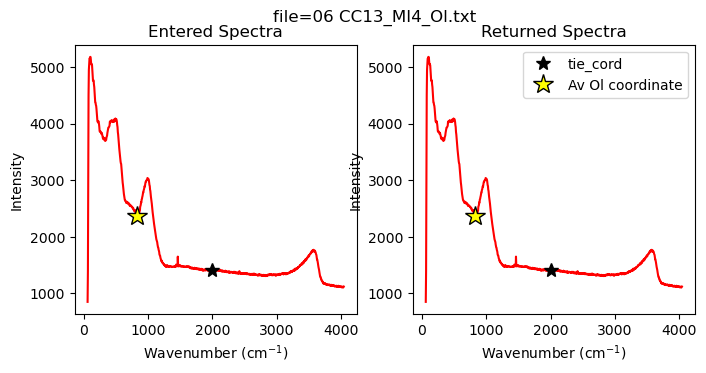

In [20]:
Spectra2=pf.check_if_spectra_negative(Spectra=MI_Mix_Best, 
path=spectra_path, filename=filename_Ol,
peak_pos_Ol=peak_pos_Ol, tie_x_cord=2000, override=False, flip=True)

## Now lets quantify the area under the silicate region

,Silicate_LHS_Back1,Silicate_LHS_Back2,Silicate_RHS_Back1,Silicate_RHS_Back2,Silicate_N_Poly,Silicate_Trapezoid_Area,Silicate_Simpson_Area,LW_Silicate_Trapezoid_Area,LW_Silicate_Simpson_Area,HW_Silicate_Trapezoid_Area,HW_Silicate_Simpson_Area,MW_Silicate_Trapezoid_Area,MW_Silicate_Simpson_Area
0,190,210,1250,1260,3,352889.680832,352995.558873,217653.306279,217653.983569,217653.306279,217653.983569,-198.998756,-214.608963


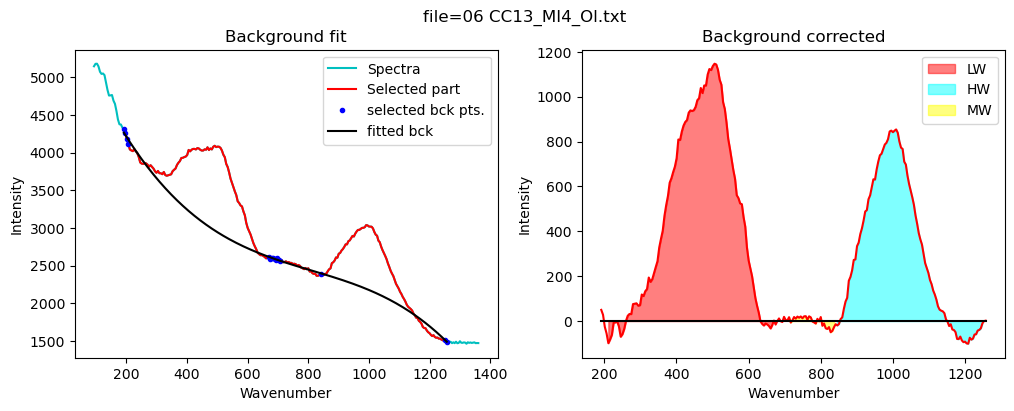

In [21]:
config_silicate=pf.sil_bck_pos_Schiavi_rhyolite()

df_sil=pf.fit_area_for_silicate_region(Spectra=Spectra2, 
path=spectra_path, filename=filename_Ol, config1=config_silicate, 
 plot_figure=True,
fit_sil='poly')
df_sil

## Now quantify the area under the water region

In [26]:
config_H2O=pf.water_bck_pos()
print(config_H2O)

water_bck_pos(fit_water='poly', N_poly_water=3, lower_bck_water=(2750, 3100), upper_bck_water=(3750, 4100))


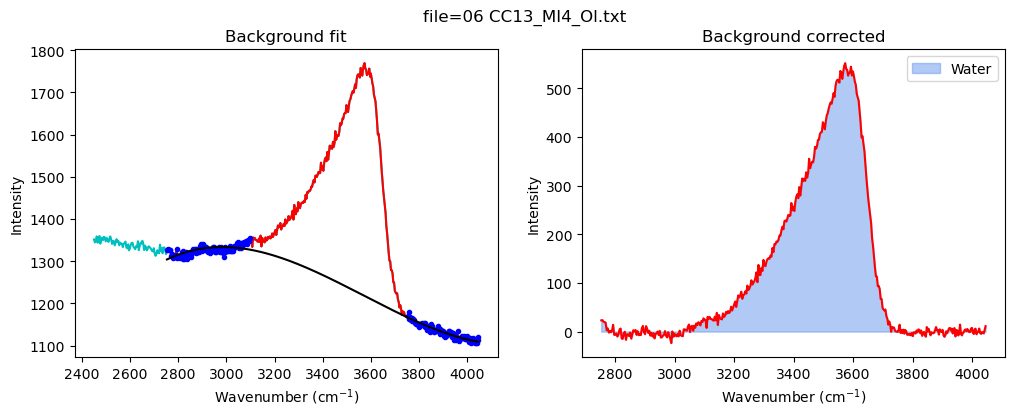

In [28]:
df_H2O=pf.fit_area_for_water_region(
path=spectra_path, filename=filename_Ol,
Spectra=Spectra2, config1=config_H2O, plot_figure=True)

In [29]:
combo_out=pf.stitch_dataframes_together(df_sil=df_sil, df_water=df_H2O, 
Ol_file=filename_Ol, MI_file=filename_H2O)

In [30]:
combo_out

,Olivine filename,MI filename,HW:LW_Trapezoid,HW:LW_Simpson,Water_Trapezoid_Area,Water_Simpson_Area,Silicate_Trapezoid_Area,Silicate_Simpson_Area,Silicate_LHS_Back1,Silicate_LHS_Back2,...,LW_Silicate_Simpson_Area,HW_Silicate_Trapezoid_Area,HW_Silicate_Simpson_Area,MW_Silicate_Trapezoid_Area,MW_Silicate_Simpson_Area,Water_LHS_Back1,Water_LHS_Back2,Water_RHS_Back1,Water_RHS_Back2,Water_N_Poly
0,06 CC13_MI4_Ol.txt,05 CC13_MI4_H2O.txt,0.734731,0.73472,159916.607641,159914.643837,352889.680832,352995.558873,190,210,...,217653.983569,217653.306279,217653.983569,-198.998756,-214.608963,2750,3100,3750,4100,3


In [31]:
print(i)
filename=str('Ol-H2O combo, file' +str(i)+'.csv')
combo_out.to_csv(filename)

1


### Click this and it will direct you in the TOC on the LHS

### Now go back and loop through as many files as you want, by changing i=...

## Once you've run all your files...
- Now stitch them, this code works by finding Stitching all the files together once you have them

In [32]:
csv_files2=pf.get_files(path=os.getcwd(), ID_str='Ol-H2O',
    sort=True, file_ext='csv')
csv_files2

['Ol-H2O combo, file0.csv',
 'Ol-H2O combo, file1.csv',
 'Ol-H2O combo, file2.csv',
 'Ol-H2O combo, file3.csv',
 'Ol-H2O combo, file4.csv',
 'Ol-H2O combo, file5.csv',
 'Ol-H2O combo, file6.csv',
 'Ol-H2O combo, file7.csv',
 'Ol-H2O combo, file8.csv']

### Now stitch data from all these CSVs together

In [33]:
df = pd.concat(
    map(pd.read_csv, csv_files2), ignore_index=True)
df

,Unnamed: 0,Olivine filename,MI filename,H2O_vs_Silicate_Area_Trapezoid,H2O_vs_Silicate_Area_Simpson,Water_Trapezoid_Area,Water_Simpson_Area,Silicate_Trapezoid_Area,Silicate_Simpson_Area,Silicate_LHS_Back1,...,Water_RHS_Back2,Water_N_Poly,HW:LW_Trapezoid,HW:LW_Simpson,LW_Silicate_Trapezoid_Area,LW_Silicate_Simpson_Area,HW_Silicate_Trapezoid_Area,HW_Silicate_Simpson_Area,MW_Silicate_Trapezoid_Area,MW_Silicate_Simpson_Area
0,0,03 CC14_MI2_Ol_96mw.txt,02 CC14_MI2_H2O_96mw.txt,0.385033,0.384900,2.110401e+05,2.109270e+05,5.481086e+05,5.480040e+05,200,...,4100,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0,06 CC13_MI4_Ol.txt,05 CC13_MI4_H2O.txt,NaN,NaN,1.599166e+05,1.599146e+05,3.528897e+05,3.529956e+05,190,...,4100,3,0.734731,0.73472,217653.306279,217653.983569,217653.306279,217653.983569,-198.998756,-214.608963
2,0,10 CC9_MI3_Ol.txt,09 CC9_MI3_H2O.txt,0.381512,0.381749,3.822418e+05,3.822973e+05,1.001914e+06,1.001437e+06,200,...,4100,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0,16 CC9_MI1_Ol_50X.txt,12 CC9_MI1_H2O_20X.txt,0.691097,0.691153,2.659896e+05,2.659791e+05,3.848804e+05,3.848337e+05,200,...,4100,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,16 CC9_MI1_Ol_50X.txt,15 CC9_MI1_H2O_50X.txt,0.415320,0.415619,2.006706e+05,2.007565e+05,4.831707e+05,4.830299e+05,200,...,4100,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,0,19 CC5_MI1_Ol.txt,18 CC5_MI1_H2O_10mw.txt,0.472119,0.472046,4.406210e+05,4.402918e+05,9.332830e+05,9.327305e+05,200,...,4100,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,0,22 CC7_MI3_Ol.txt,21 CC7_MI3_H2O.txt,0.358982,0.358259,3.399705e+05,3.393829e+05,9.470408e+05,9.473115e+05,200,...,4100,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,0,25 CC4_MI1_Ol.txt,24 CC4_MI1_H2O.txt,0.450871,0.451595,3.800482e+06,3.803850e+06,8.429201e+06,8.423140e+06,200,...,4100,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,0,30 MS13_2_MI1_Ol.txt,29 MS13_2_MI1_H2O.txt,0.096652,0.096509,8.935362e+04,8.907472e+04,9.244899e+05,9.229682e+05,200,...,4100,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Now save to Excel

In [34]:
df.to_excel('H2O_Silicate_areas.xlsx')